.pandas is a software library written for the Python programming language for data manipulation and analysis.
.NumPymis a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
.Matplotlib is a plotting library for Python. It is used along with NumPy to provide an environment that is an effective open source alternative for MatLab.
.matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB.
.Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

In [511]:
import pandas as pd
import numpy  as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('seaborn')

# Problem definition

# preparing data

In [512]:
city_temp=pd.read_csv("../data/raw/temperature.csv", parse_dates=['datetime'])
city_humid=pd.read_csv("../data/raw/humidity.csv",parse_dates=['datetime'])
city_press=pd.read_csv("../data/raw/pressure.csv",parse_dates=['datetime'])
city_speed=pd.read_csv("../data/raw/wind_speed.csv",parse_dates=['datetime'])
city_dir=pd.read_csv("../data/raw/wind_direction.csv",parse_dates=['datetime'])
city_taxi=pd.read_csv("../data/raw/taxi-NYC.csv",parse_dates=['datetime'])
city_temp.sample(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
14183,2014-05-15 11:00:00,287.85,286.302000,289.900,287.390000,284.602,293.280000,290.820000,291.720,272.652000,...,289.780000,288.83,290.66,288.860000,301.802,300.98,306.210000,297.952000,298.190000,299.052
7573,2013-08-13 01:00:00,293.93,296.390000,295.740,296.520000,297.330,293.780000,308.680000,312.450,296.490000,...,296.450000,295.61,294.33,291.720000,288.941,298.15,294.150000,294.895000,296.745000,289.995
11755,2014-02-03 07:00:00,273.05,275.860000,279.840,275.470000,281.780,283.450000,278.740000,283.440,273.970000,...,277.410000,276.65,265.06,276.090000,284.398,288.19,285.031333,289.114667,289.114667,287.870
16243,2014-08-09 07:00:00,290.12,287.819333,288.486,288.902667,288.836,288.769333,290.252667,298.536,289.202667,...,288.052667,289.46,289.38,291.519333,299.041,303.30,302.660000,300.150000,300.150000,299.286
43369,2017-09-12 13:00:00,288.12,287.270000,291.750,285.930000,293.700,293.500000,298.080000,302.130,285.980000,...,289.220000,290.64,286.78,288.460000,308.742,305.04,313.990000,307.310000,306.890000,304.930


For each city we have timeseries in a column. We are going to chose New York as our chosen city and  our chosen features. 

In [513]:
data=city_temp[['datetime','New York']]
data=data.rename(columns={'New York':'temperature'})
data.head(5)
sample = data[:168]

In [514]:
data_humid=city_humid[['datetime','New York']]
data_humid=data_humid.rename(columns={'New York':'humidity'})


In [515]:
city_press.sample(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
8548,2013-09-22 16:00:00,1014.0,1003.0,1013.0,1017.0,1009.0,1022.0,1010.0,990.0,827.0,...,1021.0,972.0,1019.0,1017.0,988.0,1014.0,1023.0,1011.0,1010.0,988.0
27709,2015-11-30 01:00:00,1022.0,1022.0,1017.0,1022.0,1019.0,1019.0,1021.0,1019.0,1012.0,...,1024.0,1027.0,1032.0,1027.0,995.0,1017.0,961.0,1026.0,1026.0,1017.0
13614,2014-04-21 18:00:00,1017.0,1017.0,1018.0,1016.0,1017.0,1018.0,1017.0,1017.0,1024.0,...,1019.0,1018.0,1012.0,1017.0,1029.0,1015.0,1026.0,1029.0,1029.0,1016.0
25921,2015-09-16 13:00:00,1010.0,1023.0,1028.0,1023.0,1026.0,1027.0,1023.0,1025.0,1027.0,...,1040.0,1027.0,1026.0,1039.0,988.0,1010.0,1008.0,1010.0,1010.0,1022.0
2409,2013-01-09 21:00:00,NaN,1019.0,1022.0,1013.0,1017.0,1018.0,1020.0,1016.0,1016.0,...,1029.0,1027.0,1024.0,1026.0,981.0,1010.0,1011.0,1009.0,1009.0,985.0


In [516]:
data_press=city_press[['datetime','New York']]
data_press=data_press.rename(columns={'New York':'pressure'})
data_press.head(5)

,datetime,pressure
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,1012.0
2,2012-10-01 14:00:00,1012.0
3,2012-10-01 15:00:00,1012.0
4,2012-10-01 16:00:00,1012.0


In [517]:
data_speed=city_speed[['datetime','New York']]
data_speed=data_speed.rename(columns={'New York':'wind_speed'})
data_speed.head(5)

,datetime,wind_speed
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,7.0
2,2012-10-01 14:00:00,7.0
3,2012-10-01 15:00:00,7.0
4,2012-10-01 16:00:00,7.0


In [518]:
data_dir=city_dir[['datetime','New York']]
data_dir=data_dir.rename(columns={'New York':'wind_direction'})
data_dir.head(5)

,datetime,wind_direction
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,260.0
2,2012-10-01 14:00:00,260.0
3,2012-10-01 15:00:00,260.0
4,2012-10-01 16:00:00,260.0


In [519]:
data = data.fillna(method = 'bfill', axis=0).dropna()
data_press = data_press.fillna(method = 'bfill', axis=0).dropna()
data_humid = data_humid.fillna(method = 'bfill', axis=0).dropna()
data_dir = data_dir.fillna(method = 'bfill', axis=0).dropna()
data_speed = data_speed.fillna(method = 'bfill', axis=0).dropna()

we have some missing value. All features's tend to be constant from one hour to the next, so we can use backfill to replace any missing values and drop the rest.There is no missing value and there is no outlayer so our data looks good.

In [520]:
total_data=pd.concat([data,data_humid['humidity'],data_press['pressure'],data_speed['wind_speed'],data_dir['wind_direction'],city_taxi['rides']], axis=1)


In [521]:
total_data.head(5)

,datetime,temperature,humidity,pressure,wind_speed,wind_direction,rides
0,2012-10-01 12:00:00,288.220000,58.0,1012.0,7.0,260.0,31
1,2012-10-01 13:00:00,288.220000,58.0,1012.0,7.0,260.0,31
2,2012-10-01 14:00:00,288.247676,57.0,1012.0,7.0,260.0,30
3,2012-10-01 15:00:00,288.326940,57.0,1012.0,7.0,260.0,30
4,2012-10-01 16:00:00,288.406203,57.0,1012.0,7.0,260.0,30


It is time to concatenate our data and create your processed database.

In [522]:
total_data['date']=total_data.datetime.dt.date

In [523]:
total_data['hour']=total_data.datetime.dt.hour

In [524]:
total_data['month']=total_data.datetime.dt.month

In [525]:
total_data['day']=total_data.datetime.dt.day

In [526]:
total_data.head(5)

,datetime,temperature,humidity,pressure,wind_speed,wind_direction,rides,date,hour,month,day
0,2012-10-01 12:00:00,288.220000,58.0,1012.0,7.0,260.0,31,2012-10-01,12,10,1
1,2012-10-01 13:00:00,288.220000,58.0,1012.0,7.0,260.0,31,2012-10-01,13,10,1
2,2012-10-01 14:00:00,288.247676,57.0,1012.0,7.0,260.0,30,2012-10-01,14,10,1
3,2012-10-01 15:00:00,288.326940,57.0,1012.0,7.0,260.0,30,2012-10-01,15,10,1
4,2012-10-01 16:00:00,288.406203,57.0,1012.0,7.0,260.0,30,2012-10-01,16,10,1


It is better to separate date from datetime.

In [527]:
data.to_csv("../data/Processed/New York_Weather_cyclical_taxi.csv.gz")

# feature engineering

In [528]:
total_data['temperature']=total_data['temperature']-273.15

It is better to convert the temperature to Celsius.

In [529]:
total_data.head(5)

,datetime,temperature,humidity,pressure,wind_speed,wind_direction,rides,date,hour,month,day
0,2012-10-01 12:00:00,15.070000,58.0,1012.0,7.0,260.0,31,2012-10-01,12,10,1
1,2012-10-01 13:00:00,15.070000,58.0,1012.0,7.0,260.0,31,2012-10-01,13,10,1
2,2012-10-01 14:00:00,15.097676,57.0,1012.0,7.0,260.0,30,2012-10-01,14,10,1
3,2012-10-01 15:00:00,15.176940,57.0,1012.0,7.0,260.0,30,2012-10-01,15,10,1
4,2012-10-01 16:00:00,15.256203,57.0,1012.0,7.0,260.0,30,2012-10-01,16,10,1


count    44461.000000
mean        12.250469
std         10.220826
min        -22.376000
25%          4.220000
50%         12.720000
75%         20.610000
max         37.090000
Name: temperature, dtype: float64


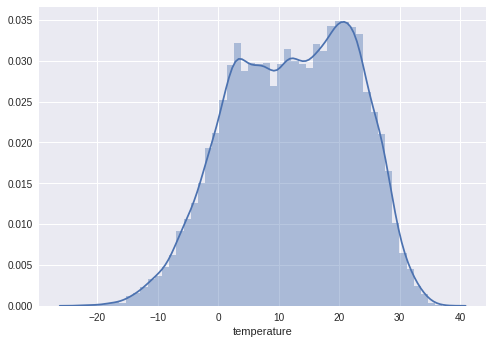

In [530]:
print(total_data.temperature.describe())
plot = sns.distplot(total_data.temperature)

count    44461.000000
mean        66.516790
std         19.884897
min         10.000000
25%         51.000000
50%         68.000000
75%         83.000000
max        100.000000
Name: humidity, dtype: float64


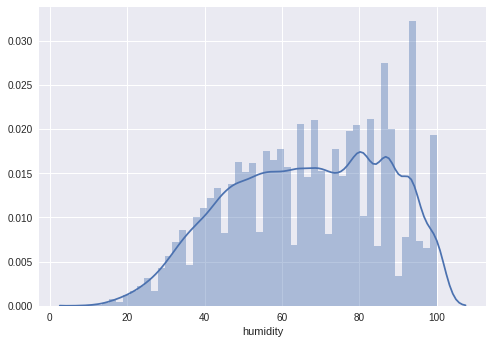

In [531]:
print(total_data.humidity.describe())
plot = sns.distplot(total_data.humidity)

count    44461.000000
mean      1017.021142
std         10.113110
min        959.000000
25%       1012.000000
50%       1017.000000
75%       1023.000000
max       1052.000000
Name: pressure, dtype: float64


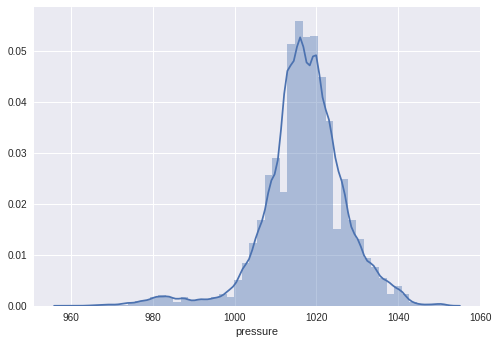

In [532]:
print(total_data.pressure.describe())
plot = sns.distplot(total_data.pressure)

count    44461.000000
mean         3.211039
std          2.189765
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         25.000000
Name: wind_speed, dtype: float64


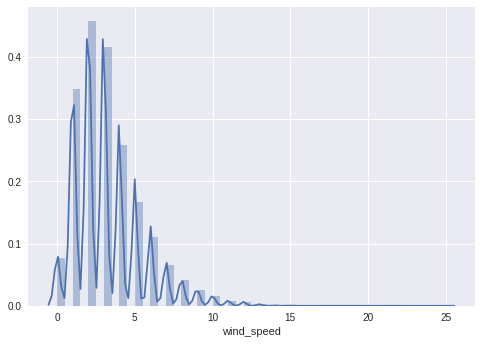

In [533]:
print(total_data.wind_speed.describe())
plot = sns.distplot(total_data.wind_speed)

count    44461.000000
mean       196.251681
std        107.432893
min          0.000000
25%        104.000000
50%        220.000000
75%        289.000000
max        360.000000
Name: wind_direction, dtype: float64


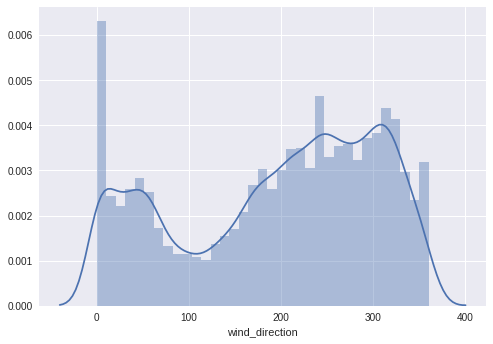

In [534]:
print(total_data.wind_direction.describe())
plot = sns.distplot(total_data.wind_direction)

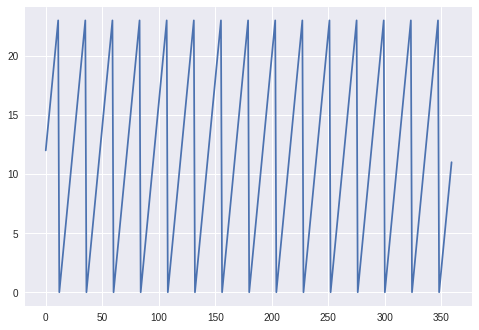

In [535]:
#We are going to extract the hours from the datetime
total_data['hour']=total_data.datetime.dt.hour
# chose a sample aproximatly 15 days
sample=total_data[:360]
sample['hour'].plot()

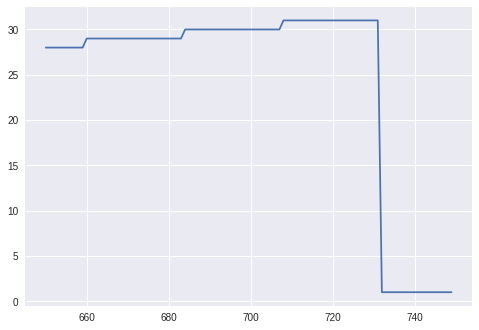

In [536]:
total_data['day']=total_data.datetime.dt.day
sample=total_data[650:750]
sample['day'].plot()

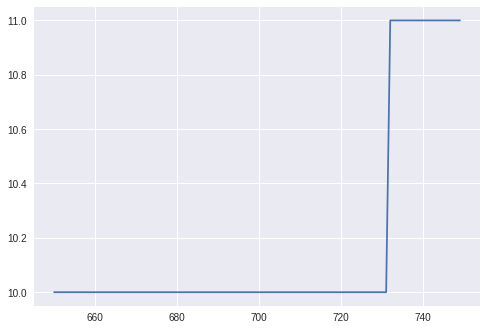

In [537]:
total_data['month']=total_data.datetime.dt.month
sample=total_data[650:750]
sample['month'].plot()

we need to see a cycle betwwn 0 and 23 that repeat 15 times. when the time goes from 23 to 0 we have a jump, so there is a problem about presenting syclical data to machine learning algorithem. we chose one day to have a look at the time arounf midnight

between record 34 and 35 : 23-22=1
between record 35 and 36 : 0-23=-23
so we need to change the encoding of the feature. A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation.

we need to see a cycle betwwn 0 and 23 that repeat 15 times. when the time goes from 23 to 0 we have a jump, so there is a problem about presenting syclical data to machine learning algorithem. we chose one day to have a look at the time arounf midnight

In [538]:
def cyclical(dataset,column,max_v):
    dataset[column+'_sin']=np.sin(2*np.pi*dataset[column]/max_v)
    dataset[column+'_cos']=np.cos(2*np.pi*dataset[column]/max_v)
    return dataset


In [539]:
total_data.head(5)

,datetime,temperature,humidity,pressure,wind_speed,wind_direction,rides,date,hour,month,day
0,2012-10-01 12:00:00,15.070000,58.0,1012.0,7.0,260.0,31,2012-10-01,12,10,1
1,2012-10-01 13:00:00,15.070000,58.0,1012.0,7.0,260.0,31,2012-10-01,13,10,1
2,2012-10-01 14:00:00,15.097676,57.0,1012.0,7.0,260.0,30,2012-10-01,14,10,1
3,2012-10-01 15:00:00,15.176940,57.0,1012.0,7.0,260.0,30,2012-10-01,15,10,1
4,2012-10-01 16:00:00,15.256203,57.0,1012.0,7.0,260.0,30,2012-10-01,16,10,1


between record 34 and 35 : 23-22=1
between record 35 and 36 : 0-23=-23
so we need to change the encoding of the feature. A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation.

In [540]:
total_data= cyclical(total_data,'hour',23.0)
total_data= cyclical(total_data,'day',365.0)
total_data= cyclical(total_data,'month',12.0)

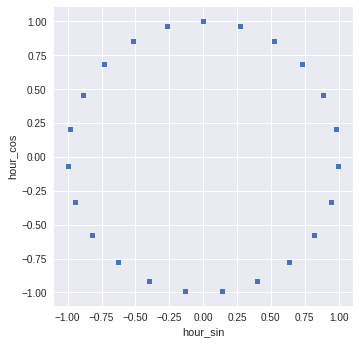

In [541]:
#total_data=total_data[['hour_sin','hour_cos','day_sin','day_cos','month_sin','month_cos','humidity','wind_speed','wind_direction','temperature','day','month','hour','rides']]
total_data.head(5)
total_data.plot.scatter('hour_sin','hour_cos').set_aspect('equal')

now, it is prefect to present as a cyclical feature for machine learning algorithms.

In [542]:
total_data.head(5)

,datetime,temperature,humidity,pressure,wind_speed,wind_direction,rides,date,hour,month,day,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
0,2012-10-01 12:00:00,15.070000,58.0,1012.0,7.0,260.0,31,2012-10-01,12,10,1,-0.136167,-0.990686,0.017213,0.999852,-0.866025,0.5
1,2012-10-01 13:00:00,15.070000,58.0,1012.0,7.0,260.0,31,2012-10-01,13,10,1,-0.398401,-0.917211,0.017213,0.999852,-0.866025,0.5
2,2012-10-01 14:00:00,15.097676,57.0,1012.0,7.0,260.0,30,2012-10-01,14,10,1,-0.631088,-0.775711,0.017213,0.999852,-0.866025,0.5
3,2012-10-01 15:00:00,15.176940,57.0,1012.0,7.0,260.0,30,2012-10-01,15,10,1,-0.816970,-0.576680,0.017213,0.999852,-0.866025,0.5
4,2012-10-01 16:00:00,15.256203,57.0,1012.0,7.0,260.0,30,2012-10-01,16,10,1,-0.942261,-0.334880,0.017213,0.999852,-0.866025,0.5



# Visualization of the correlation between the features

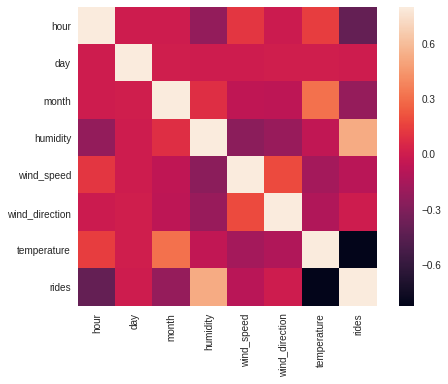

In [545]:
sample=total_data[['hour','day','month','humidity','wind_speed','wind_direction','temperature','rides']]
corrmat = sample.corr()
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

Obviously we see negative correlation between temperature and taxi rides. It confirms that we need to analyze them in depth.
There is not signeficant correlation between independent variable so we can use them as a predictor.

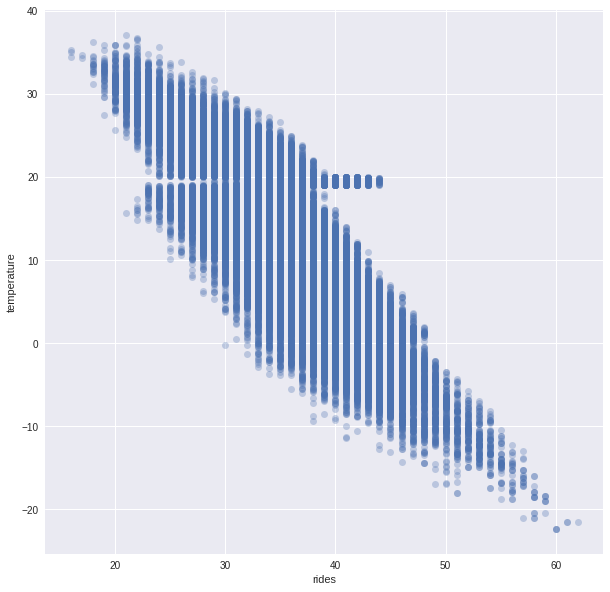

In [546]:


plt.figure(figsize=(10,10))
plt.ylabel('temperature')
plt.xlabel('rides')

plt.plot(total_data['rides'], total_data['temperature'], 'o', alpha=0.3)
plt.show()

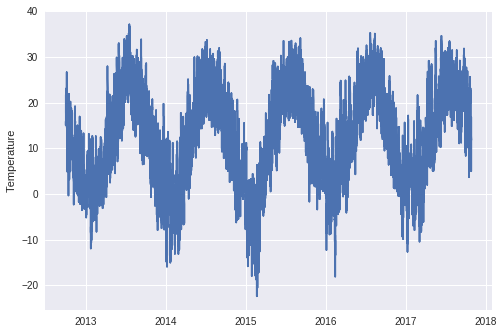

In [547]:

plt.plot(total_data.date, total_data.temperature)
plt.ylabel('Temperature');


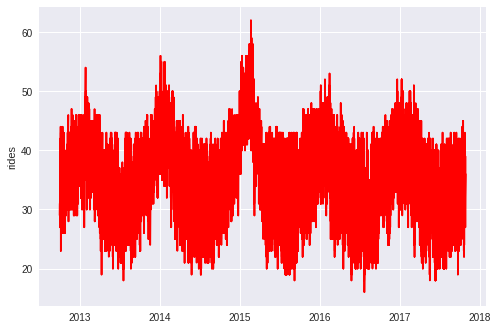

In [548]:
plt.plot(total_data.date, total_data.rides,'r')
plt.ylabel('rides');
plt.show()

# feature engineering 

In [502]:
def get_encode_feature(total_data):
        return total_data[['day_cos','hour_cos','hour_sin','day_sin','month_sin','month_cos','temperature']]

Let's split our data into training and test sets.

In [503]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(total_data, test_size=0.4)
data_test, data_val = train_test_split(data_test, test_size=0.5)

In [504]:
X_train=get_encode_feature(data_train)
X_test=get_encode_feature(data_test)
y_train=data_train.rides
y_test=data_test.rides
threshold = 0.8
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)



X_train (26676, 7)
y_train (26676,)
X_test (8892, 7)
y_test (8892,)


# Model Training / Evaluation 

MODEL LinearRegression
MAE 2.5271397965547373
RMSE 3.122908042972423


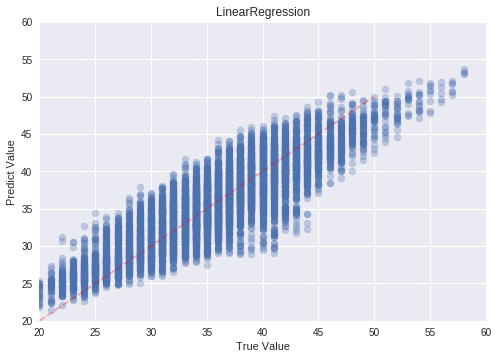

Feature Importance
             0         1
2     hour_sin  2.335414
5    month_cos -0.437984
6  temperature -0.540080
1     hour_cos -0.950767
4    month_sin -0.978349

MODEL RandomForestRegressor10
MAE 1.9925978407557354
RMSE 2.550132805568247


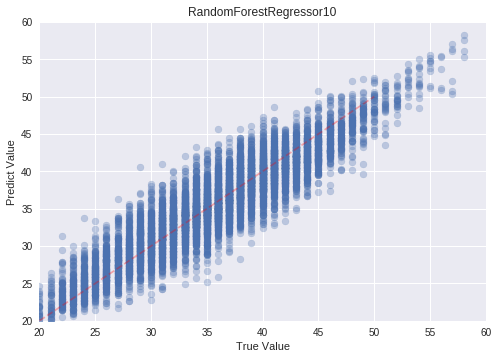

Feature Importance
             0         1
6  temperature  0.802704
2     hour_sin  0.075199
1     hour_cos  0.031550
3      day_sin  0.028550
0      day_cos  0.027902

MODEL RandomForestRegressor100
MAE 1.9271672477133004
RMSE 2.4491046289560185


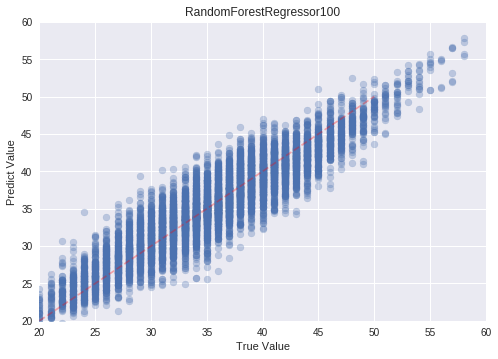

Feature Importance
             0         1
6  temperature  0.803816
2     hour_sin  0.073847
1     hour_cos  0.031891
3      day_sin  0.028585
0      day_cos  0.028477



,model,mae,rmse
2,RandomForestRegressor100,1.927167,2.449105
1,RandomForestRegressor10,1.992598,2.550133
0,LinearRegression,2.527140,3.122908


In [505]:
models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
    ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100)),
]
results = []
for m in models:
    print('MODEL', m[0])
    model = m[1]
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('MAE', mae)
    print('RMSE', rmse)
    # print the chart
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot(range(20,60, 10), range(20,60, 10), '--r', alpha=0.3, label='Line1')
    plt.title(m[0])
    plt.xlabel('True Value')
    plt.ylabel('Predict Value')
    plt.xlim([20, 60])
    plt.ylim([20, 60])
    plt.show()
    results.append([m[0], mae, rmse])
    
    # if there is a feature importance, print top 5
    importance = []
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance')
        importance = []
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.feature_importances_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
    elif hasattr(model, 'coef_'):
        print('Feature Importance')
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.coef_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
        
    print('')

# sort the results and print as a table
df_results = pd.DataFrame(results)
df_results.columns = ['model', 'mae', 'rmse']
df_results = df_results.sort_values(by='mae')
df_results